# Global Air Quality (2024) - 6 Cities: 
## Air Quality Index (AQI) Prediction
```
Required Dataset: Air Quality dataset
Dataset Link:
https://www.kaggle.com/datasets/youssefelebiary/air-quality-2024/data
```

In [1]:
# Import neccessary libraries for this task
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import these clases from sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, davies_bouldin_score, silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

## Load Dataset
The loaded data set for this task is the combined air quality dataset that contains data from 6 global cities (Brasilia, Cairo, Dubai, London, Newyork, and Sydney). The file Air_Quality.csv includes measurements such as CO, CO2, NO2, SO2, O3, PM2.5, PM10 and the Air Quality Index (AQI) along with the date and city information

In [3]:
# Using pandas 
path = "./Air_Quality.csv"
air_quality_df = pd.read_csv(path)

# Display just 5 rows of the dataset
air_quality_df.head()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,NaN,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,NaN,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,NaN,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,NaN,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,NaN,13.0,2.1,40.0,10.2,14.6,16.000000


In [4]:
# Display the last 5 rows of the dataset to confirm CO2 data values are not all NaN
air_quality_df.tail()

,Date,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
52699,2024-12-31 19:00:00+00:00,Sydney,106.0,448.0,15.5,6.4,26.0,9.7,13.0,19.199997
52700,2024-12-31 20:00:00+00:00,Sydney,112.0,449.0,15.7,8.3,29.0,11.1,13.6,19.183330
52701,2024-12-31 21:00:00+00:00,Sydney,115.0,449.0,14.7,9.8,36.0,11.5,15.1,19.274998
52702,2024-12-31 22:00:00+00:00,Sydney,113.0,447.0,11.8,10.7,53.0,11.6,15.7,21.199999
52703,2024-12-31 23:00:00+00:00,Sydney,107.0,443.0,7.8,11.3,74.0,12.6,17.1,29.600000


In [5]:
# Check for duplicate records
duplicate_rows = air_quality_df[air_quality_df.duplicated()]
print(f"Number of duplicated rows: {len(duplicate_rows)}")

Number of duplicated rows: 0


In [6]:
# Keep a copy of the loaded dataset
air_quality_df_copy = air_quality_df.copy()

In [7]:
# Information on the dataset
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    52704 non-null  object 
 1   City    52704 non-null  object 
 2   CO      52704 non-null  float64
 3   CO2     9648 non-null   float64
 4   NO2     52704 non-null  float64
 5   SO2     52704 non-null  float64
 6   O3      52704 non-null  float64
 7   PM2.5   52704 non-null  float64
 8   PM10    52704 non-null  float64
 9   AQI     52704 non-null  float64
dtypes: float64(8), object(2)
memory usage: 4.0+ MB


In [8]:
# Number of rows and columns of the loaded dataset
air_quality_df.shape

(52704, 10)

In [9]:
# Column names in the dataset
air_quality_df.columns

Index(['Date', 'City', 'CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10',
       'AQI'],
      dtype='object')

In [10]:
# Account for missing values in the dataframe
missing_values = air_quality_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64


In [11]:
# Finding out percentage of missing values in CO2 column
missing_percentage = air_quality_df["CO2"].isna().mean() * 100
print(f"Missing values in CO2 column: {missing_percentage:.2f}%")

Missing values in CO2 column: 81.69%


## Data Cleaning and Preprocessing

### Drop Column
- Since CO2 has a very large percentage of data missing, filling it might introduce bias

In [12]:
air_quality_df.drop(["CO2"], inplace=True, axis=1)

In [13]:
# Confirm the CO2 column has been dropped
air_quality_df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,23.8,2.8,42.0,12.0,17.1,16.800000
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,21.9,2.7,40.0,12.5,17.9,16.000000
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,19.2,2.6,39.0,12.1,17.3,15.599999
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,16.3,2.4,38.0,11.4,16.2,15.200000
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,13.0,2.1,40.0,10.2,14.6,16.000000


### Typecast Date column
- Convert Date column from object type to datetime

In [14]:
# Convert Date column from object type to datetime
air_quality_df["Date"] = pd.to_datetime(air_quality_df["Date"], utc=True, errors="coerce")

In [15]:
# Confirm the Date column type cast is effective and all columns are free from null
air_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   Date    52704 non-null  datetime64[ns, UTC]
 1   City    52704 non-null  object             
 2   CO      52704 non-null  float64            
 3   NO2     52704 non-null  float64            
 4   SO2     52704 non-null  float64            
 5   O3      52704 non-null  float64            
 6   PM2.5   52704 non-null  float64            
 7   PM10    52704 non-null  float64            
 8   AQI     52704 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 3.6+ MB


## Exploratory Data Analysis


In [16]:
# Extract only numeric columns for correlation analysis
numeric_df = air_quality_df.select_dtypes(include=[np.number])

In [17]:
numeric_df

,CO,NO2,SO2,O3,PM2.5,PM10,AQI
0,323.0,23.8,2.8,42.0,12.0,17.1,16.800000
1,318.0,21.9,2.7,40.0,12.5,17.9,16.000000
2,309.0,19.2,2.6,39.0,12.1,17.3,15.599999
3,295.0,16.3,2.4,38.0,11.4,16.2,15.200000
4,270.0,13.0,2.1,40.0,10.2,14.6,16.000000
...,...,...,...,...,...,...,...
52699,106.0,15.5,6.4,26.0,9.7,13.0,19.199997
52700,112.0,15.7,8.3,29.0,11.1,13.6,19.183330
52701,115.0,14.7,9.8,36.0,11.5,15.1,19.274998
52702,113.0,11.8,10.7,53.0,11.6,15.7,21.199999


### Pairplot to show bivariate relationship
- Labels on the vertical axis represent the y-axis while those on the horizontal axis represents the x-axis

NB: The diagonal axis where there is little or no information signifies a relationship of a feature with itself

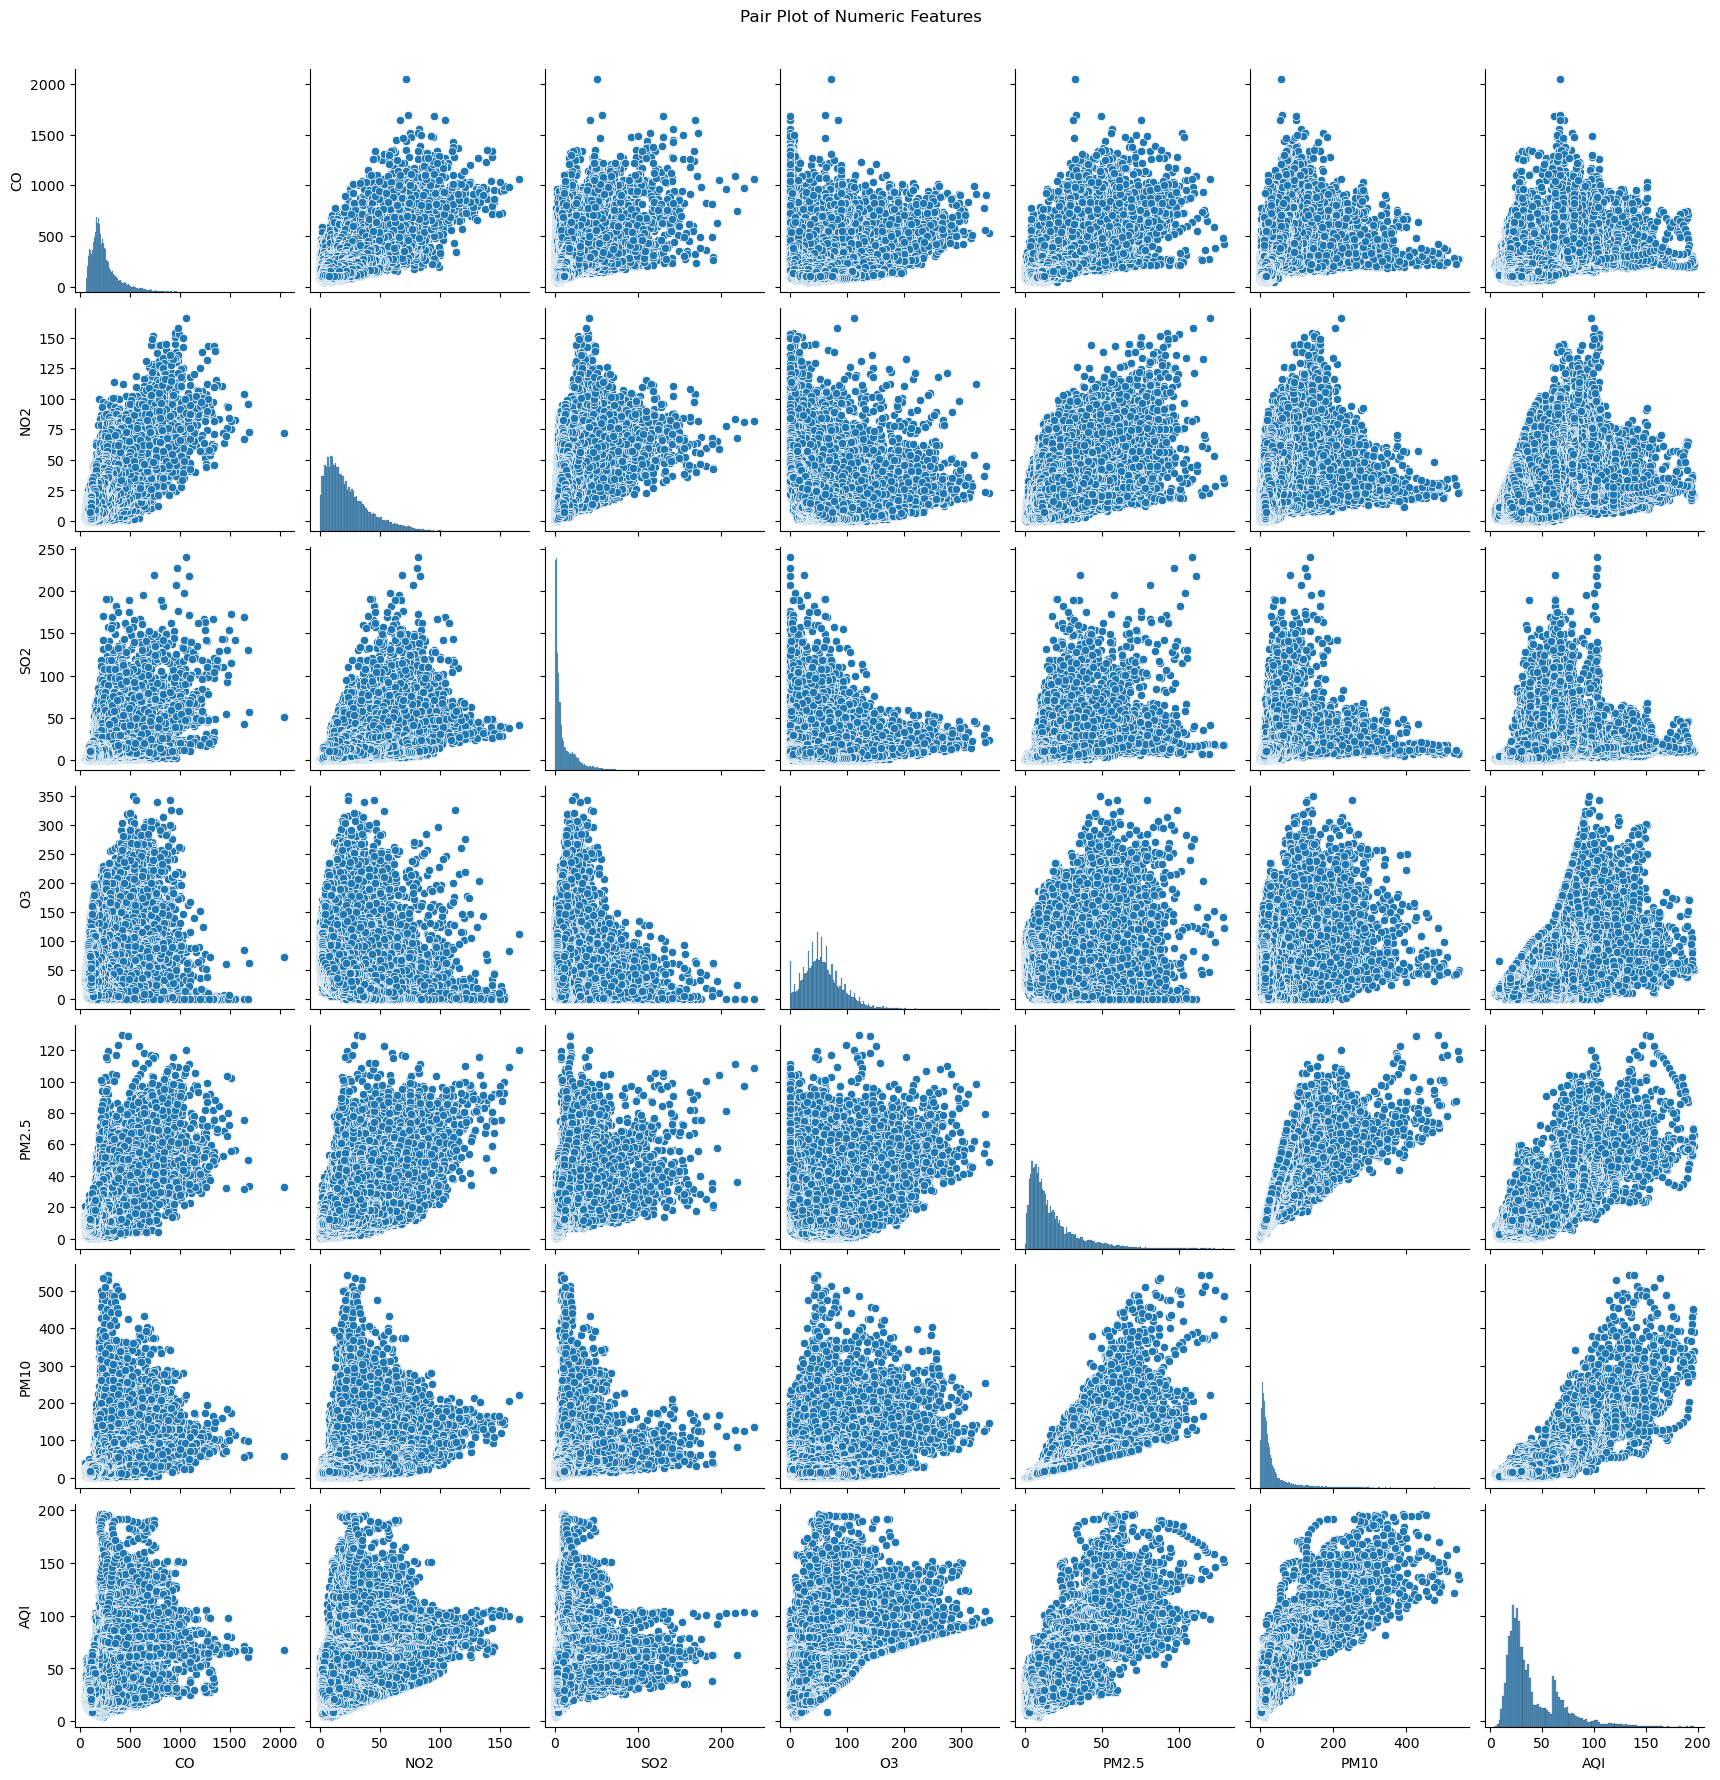

In [18]:
# Pair Plot to view bivariate relationships
sns.pairplot(numeric_df, diag_kind='hist')
# y=1.02 prevents the title from overlapping with the top row of plots in the pairplot,
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
# Show plot
plt.show()

### Histogram of each numerical feature

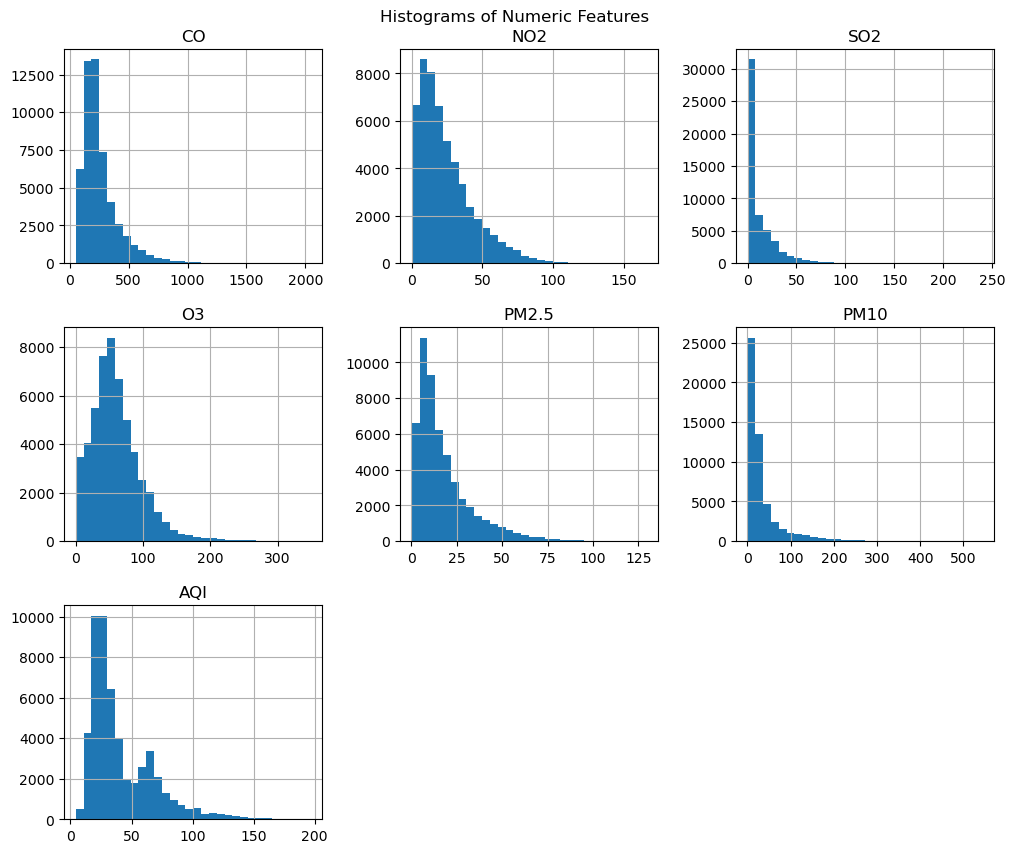

In [19]:
# Histograms for each numeric feature
numeric_df.hist(bins=30, figsize=(12, 10))
# y=0.92 is used to avoid the overlapping of title name and plot
plt.suptitle('Histograms of Numeric Features', y=0.92)
# Show plot
plt.show()

### Correlation Matrix

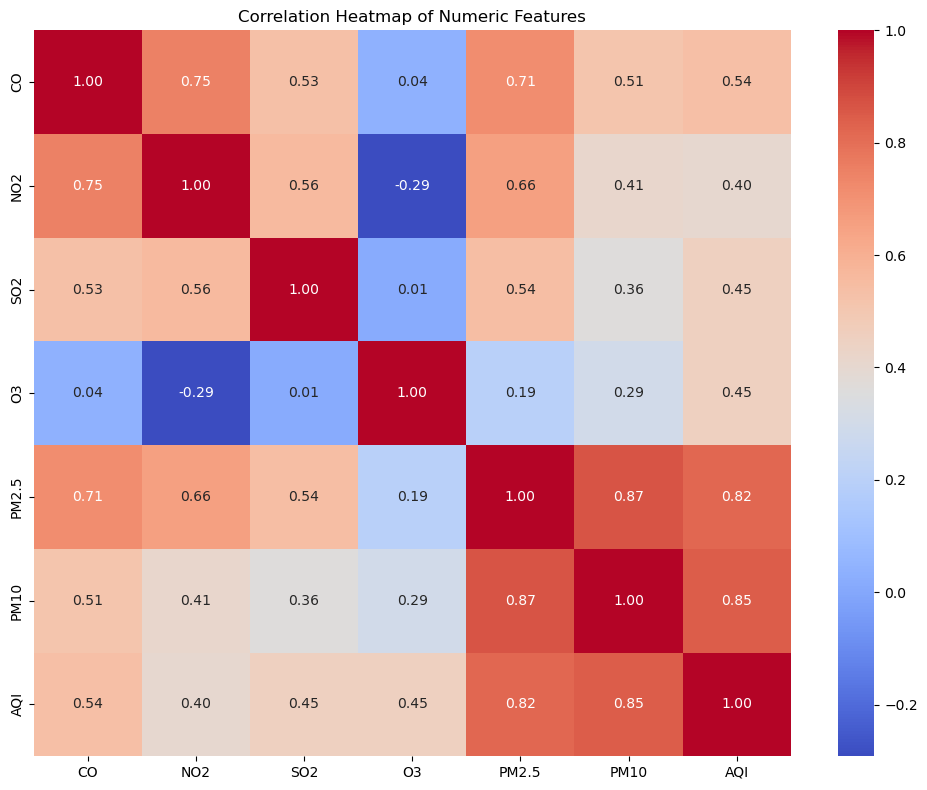

In [20]:
# Compute correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
# Add title
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
# Show plot
plt.show()

### Box Plot

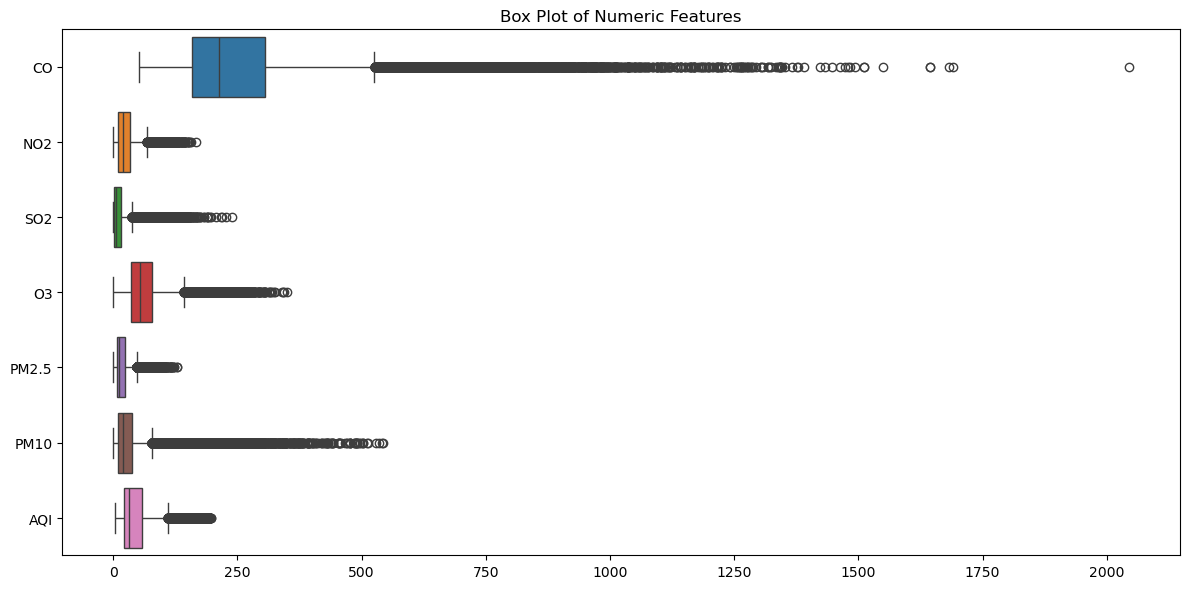

In [21]:
# Box Plot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df, orient='h')
# Add title
plt.title('Box Plot of Numeric Features')
plt.tight_layout()
# Show plot
plt.show()

## Regression Models with Numerical Features
Taking the numerical features into consideration, a regression model could be used to predict the Air Quality Index (AQI) based on the other pollutants. In this section, some regression models will be trained and its performance evaluated based on some evaluation metrics (R-squared score, mean absolute error, root mean squared error, etc). But first we have to split the dataset into training and testing sets. 
```
# Select the regression model
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForestRegressor": RandomForestRegressor(random_state=42),
        "SVR": SVR(kernel="rbf"),
        "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
        "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42)
    }

# functions
evaluate_multiple_regression(X_train, X_test, y_train, y_test, feature_names, model_type="LinearRegression")
plot_actual_vs_predicted(y_test, y_pred, model_name="Model")
```
**NB: Use the models keys to apply the regressors of choice**


In [22]:
# feature_names represents the pollutants (independent variables/input feature)
feature_names = ["CO", "NO2", "SO2", "O3", "PM2.5", "PM10"]
# target represents "AQI" (dependent variable/output feature)
target = "AQI"

In [23]:
X = air_quality_df[feature_names]
y = air_quality_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
def evaluate_multiple_regression(X_train, X_test, y_train, y_test, feature_names, model_type="LinearRegression"):
    """
    Function to perform multiple regression analysis using different regression models.

    Parameters:
    X_train, X_test : array-like
        Training and testing feature sets.
    y_train, y_test : array-like
        Training and testing target sets.
    feature_names : list
        List of feature names for plotting importance (if supported).
    model_type (str): The type of regression model to use. Options: 
                      "LinearRegression", "RandomForestRegressor", "SVR", 
                      "GradientBoostingRegressor", "DecisionTreeRegressor".

    Returns:
    dict: Dictionary containing trained model, and y_pred.
    """

    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Define models
    models = {
        "LinearRegression": LinearRegression(),
        "RandomForestRegressor": RandomForestRegressor(random_state=42),
        "SVR": SVR(kernel="rbf"),
        "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
        "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42)
    }

    if model_type not in models:
        raise ValueError(f"Invalid model type: {model_type}. Choose from {list(models.keys())}")

    # Train the model
    model = models[model_type]
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Evaluation metrics
    mean_abs = mean_absolute_error(y_test, y_pred)
    mean_squared = mean_squared_error(y_test, y_pred)
    rms_error = np.sqrt(mean_squared)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print(f"{model_type} Results:")
    print(f"Mean Absolute Error: {mean_abs}")
    print(f"Mean Squared Error: {mean_squared}")
    print(f"Root Mean Squared Error: {rms_error}")
    print(f"R2 Score: {r2}")

    # Plot feature importances for models that support it
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(10, 6))
        plt.barh(range(len(indices)), importances[indices], color='b', align='center')
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.title(f'Feature Importances ({model_type})')
        plt.xlabel('Relative Importance')
        plt.show()

    return {
        "model": model,
        "y_test": y_test,
        "y_pred": y_pred
    }


In [25]:
def plot_actual_vs_predicted(y_test, y_pred, model_name="Model"):
    """
    Function to plot actual vs predicted values.
    
    Parameters:
    y_test : array-like
        True target values.
    y_pred : array-like
        Predicted target values.
    model_name : str
        Name of the regression model.
    
    Returns:
    None
    """

    # Create scatter plot
    plt.scatter(y_test, y_pred, alpha=0.6) # alpha is used to create clarity of datapoints

    # Add a diagonal reference line
    min_val, max_val = min(y_test), max(y_test)
    plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")
    
    # Set labels and title
    plt.title(f"Actual vs. Predicted AQI {model_name}")
    plt.xlabel(f"Actual AQI")
    plt.ylabel(f"Predicted AQI")

    # Show the plot
    plt.show()

### LinearRegression

In [26]:
# Call function to fetch LinearRegression evaluation metrics
lr_model = evaluate_multiple_regression(X_train=X_train, X_test=X_test, y_train=y_train, 
                                        y_test=y_test, feature_names=feature_names, model_type="LinearRegression")

LinearRegression Results:
Mean Absolute Error: 7.882876813065392
Mean Squared Error: 126.46934975953765
Root Mean Squared Error: 11.245859227268392
R2 Score: 0.8132824706681391


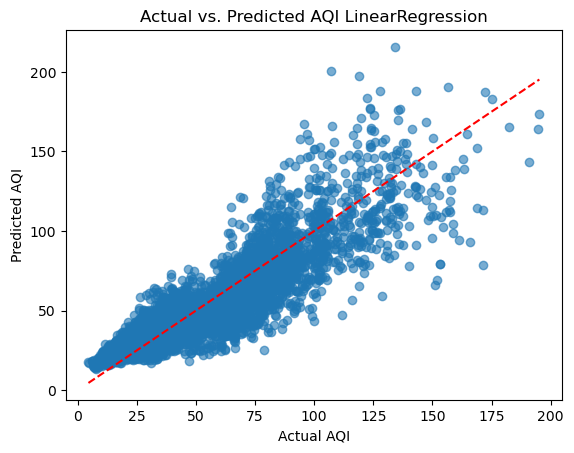

In [27]:
# Plot actual vs predicted for LinearRegression
lr_model_plot = plot_actual_vs_predicted(y_test=lr_model["y_test"], y_pred=lr_model["y_pred"], model_name="LinearRegression")

### RandomForestRegressor

RandomForestRegressor Results:
Mean Absolute Error: 4.634274428826866
Mean Squared Error: 60.044549098573825
Root Mean Squared Error: 7.748841790782273
R2 Score: 0.911351091162815


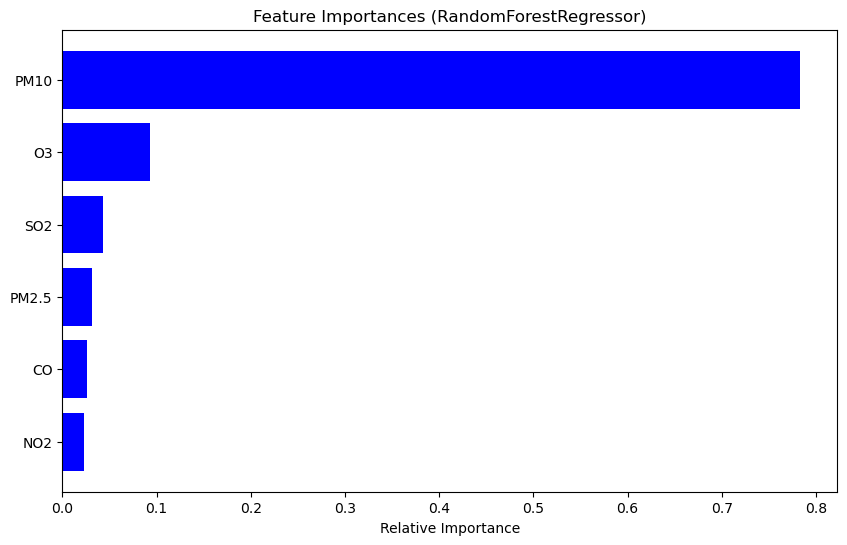

In [28]:
# Call function to fetch RandomForestRegressor evaluation metrics
rf_model = evaluate_multiple_regression(X_train=X_train, X_test=X_test, y_train=y_train, 
                                        y_test=y_test, feature_names=feature_names, model_type="RandomForestRegressor")

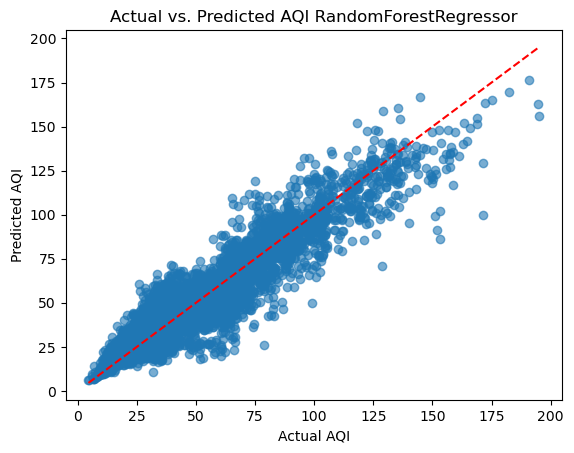

In [29]:
# Plot actual vs predicted for RandomForestRegressor
rf_model_plot = plot_actual_vs_predicted(y_test=rf_model["y_test"], y_pred=rf_model["y_pred"], 
                                         model_name="RandomForestRegressor")

### SVR

In [30]:
# Call function to fetch SVR evaluation metrics
svr_model = evaluate_multiple_regression(X_train=X_train, X_test=X_test, y_train=y_train, 
                                        y_test=y_test, feature_names=feature_names, model_type="SVR")

SVR Results:
Mean Absolute Error: 5.196085575527829
Mean Squared Error: 84.06899027897845
Root Mean Squared Error: 9.168914345710643
R2 Score: 0.8758817516800643


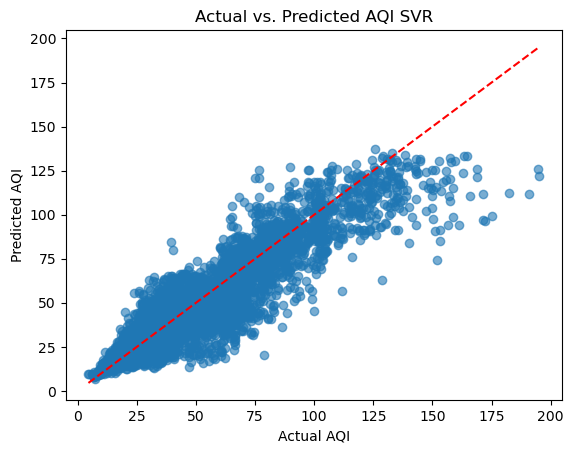

In [31]:
# Plot actual vs predicted for SVR
svr_model_plot = plot_actual_vs_predicted(y_test=svr_model["y_test"], y_pred=svr_model["y_pred"], model_name="SVR")

### GradientBoostingRegressor

GradientBoostingRegressor Results:
Mean Absolute Error: 5.566766415272615
Mean Squared Error: 79.59900286552089
Root Mean Squared Error: 8.921827327712686
R2 Score: 0.8824811768180304


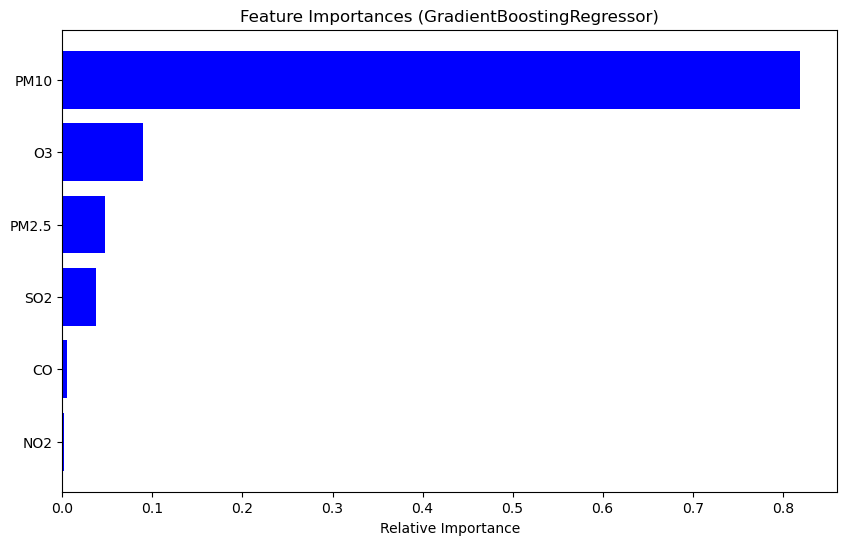

In [32]:
# Call function to fetch GradientBoostingRegressor evaluation metrics
gbr_model = evaluate_multiple_regression(X_train=X_train, X_test=X_test, y_train=y_train, 
                                        y_test=y_test, feature_names=feature_names, model_type="GradientBoostingRegressor")

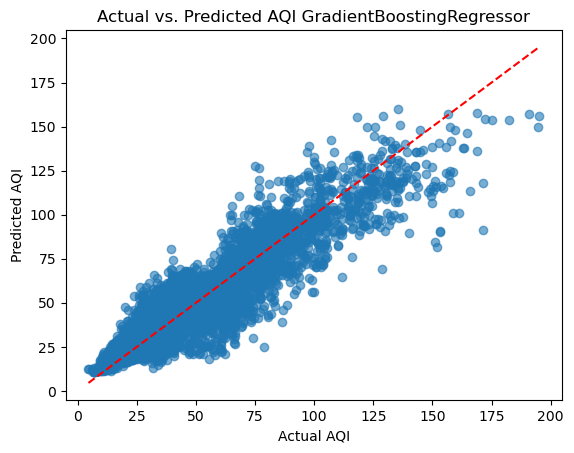

In [33]:
# Plot actual vs predicted for GradientBoostingRegressor
gbr_model_plot = plot_actual_vs_predicted(y_test=gbr_model["y_test"], y_pred=gbr_model["y_pred"], 
                                          model_name="GradientBoostingRegressor")

### DecisionTreeRegressor

DecisionTreeRegressor Results:
Mean Absolute Error: 5.779069407390193
Mean Squared Error: 116.97737623197364
Root Mean Squared Error: 10.815607991785466
R2 Score: 0.8272962838878637


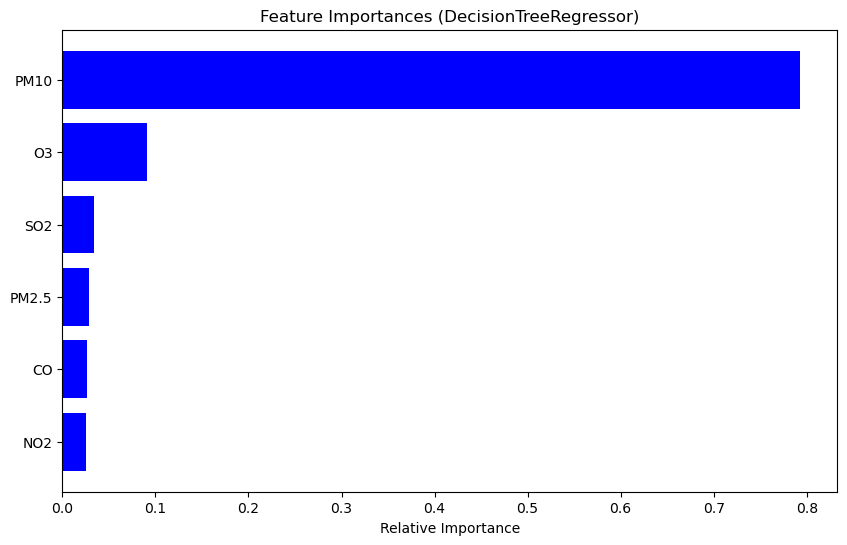

In [34]:
# Call function to fetch DecisionTreeRegressor evaluation metrics
dtr_model = evaluate_multiple_regression(X_train=X_train, X_test=X_test, y_train=y_train, 
                                        y_test=y_test, feature_names=feature_names, model_type="DecisionTreeRegressor")

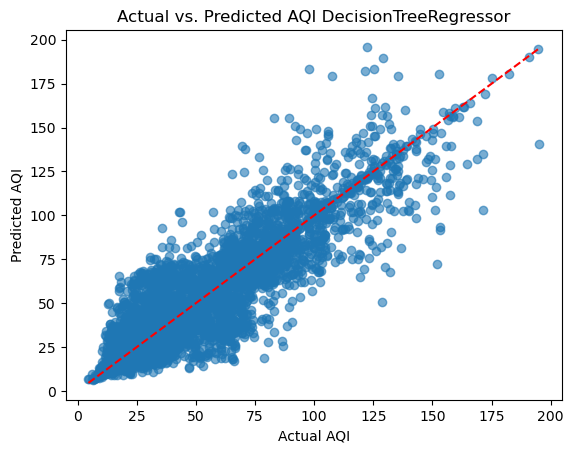

In [35]:
# Plot actual vs predicted for DecisionTreeRegressor
dtr_model_plot = plot_actual_vs_predicted(y_test=dtr_model["y_test"], y_pred=dtr_model["y_pred"], 
                                          model_name="DecisionTreeRegressor")

## Classification Models
Train classification models to predict AQI categories (e.g., “Good”, “Moderate”, “Unhealthy”) from pollutant levels.
- Create a function that categorizes AQI and create a new column "AQI_Category" to hold the categories

```
# Select the classification model
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "SVM": SVC(probability=True),
        "KNeighborsClassifier": KNeighborsClassifier()
    }

# functions
categorize_aqi(aqi)
train_classification_models(X_train, X_test, y_train, y_test, model_type='all')
plot_confusion_matrix(y_test, y_pred, class_names, model_name="Model")
```

In [36]:
# Create a function that categorizes AQI
# These six categories are consistent with the official AQI ranges
def categorize_aqi(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

In [37]:
# Apply "categorize_aqi" function to create a new column "AQI_Category"
air_quality_df["AQI_Category"] = air_quality_df["AQI"].apply(categorize_aqi)

In [38]:
# Check distribution of categories
print(air_quality_df["AQI_Category"].value_counts())

Good                       37547
Moderate                   12975
Unhealthy for Sensitive     1965
Unhealthy                    217
Name: AQI_Category, dtype: int64


In [39]:
air_quality_df.head()

,Date,City,CO,NO2,SO2,O3,PM2.5,PM10,AQI,AQI_Category
0,2024-01-01 00:00:00+00:00,Brasilia,323.0,23.8,2.8,42.0,12.0,17.1,16.800000,Good
1,2024-01-01 01:00:00+00:00,Brasilia,318.0,21.9,2.7,40.0,12.5,17.9,16.000000,Good
2,2024-01-01 02:00:00+00:00,Brasilia,309.0,19.2,2.6,39.0,12.1,17.3,15.599999,Good
3,2024-01-01 03:00:00+00:00,Brasilia,295.0,16.3,2.4,38.0,11.4,16.2,15.200000,Good
4,2024-01-01 04:00:00+00:00,Brasilia,270.0,13.0,2.1,40.0,10.2,14.6,16.000000,Good


In [40]:
# For classification, our target will now be "AQI_Category"
# X remains the same from regression task earlier, y changes
y_cl = air_quality_df["AQI_Category"]

# Encode AQI categories into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y_cl)

# Split data into training and testing sets (classification task)
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [41]:
def train_classification_models(X_train, X_test, y_train, y_test, model_type='all'):
    """
    Train and evaluate classification model(s) for predicting AQI Category based on pollutant levels.
    
    Parameters:
    X_train, X_test : array-like
        Training and testing feature sets.
    y_train, y_test : array-like
        Training and testing target sets.
    model_type (str): The model to train ('logistic_regression', 'decision_tree', 
                        'random_forest', 'gradient_boosting', 'support_vector_machine', 
                        'K-nearest_neighbors', or 'all').
    returns: model, y_test, y_pred, results_df
    
    """

    # Define model options
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42),
        "RandomForestClassifier": RandomForestClassifier(random_state=42),
        "GradientBoostingClassifier": GradientBoostingClassifier(random_state=42),
        "SVM": SVC(probability=True),
        "KNeighborsClassifier": KNeighborsClassifier()
    }

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Subset models
    valid_models = list(models.keys())

    # Run all models to show comparison table and best performer
    if model_type == "all":
        results = []
        for name in valid_models:
            model = models[name]
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)

            # evaluation metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
            recall = recall_score(y_test, y_pred, average='weighted')
            f1 = f1_score(y_test, y_pred, average='weighted')

            results.append({
                "model": name,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1-score": f1
            })

        results_df = pd.DataFrame(results).sort_values(by="f1-score", ascending=False).reset_index(drop=True)
        best_model = results_df.loc[results_df['f1-score'].idxmax()]

        print("\nModel Performance Summary:")
        print(results_df)
        print(f"\nBest Model: {best_model['model']}")
        print(f"Accuracy: {best_model['accuracy']:.4f}")
        print(f"Precision: {best_model['precision']:.4f}")
        print(f"Recall: {best_model['recall']:.4f}")
        print(f"F1-Score: {best_model['f1-score']:.4f}")

        return results_df

    # Single model mode
    elif model_type in valid_models:
        model = models[model_type]
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # Classification report
        report = classification_report(y_test, y_pred)
        print(f"Classification Report for {model_type}:")
        print(report)

        return {
            "model": model,
            "y_test": y_test,
            "y_pred": y_pred
        }

    else:
        raise ValueError(f"Invalid model name. Choose from {valid_models} or 'all'.")

In [42]:
def plot_confusion_matrix(y_test, y_pred, class_names, model_name="Model"):
    """
    Plot a confusion matrix for classification results.

    Parameters:
    y_test : array-like
        True class labels.
    y_pred : array-like
        Predicted class labels.
    class_names : label_encoder classes
    model_name : str
        Name of the classification model.
    """
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot()
    
    # Rotate x-axis labels to avoid overlapping
    plt.xticks(rotation=45, ha='right') 
    
    # Add title
    plt.title(f"Confusion Matrix - {model_name}")
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [43]:
# Run all models and fetch performance summary
all_model = train_classification_models(X_train=X_train_cl, X_test=X_test_cl, 
                                        y_train=y_train_cl, y_test=y_test_cl, model_type='all')


Model Performance Summary:
                        model  accuracy  precision    recall  f1-score
0      RandomForestClassifier  0.928849   0.927757  0.928849  0.927721
1        KNeighborsClassifier  0.923252   0.921568  0.923252  0.922121
2  GradientBoostingClassifier  0.909971   0.907333  0.909971  0.908187
3                         SVM  0.910919   0.908715  0.910919  0.907899
4      DecisionTreeClassifier  0.892610   0.893021  0.892610  0.892808
5          LogisticRegression  0.887582   0.882688  0.887582  0.883897

Best Model: RandomForestClassifier
Accuracy: 0.9288
Precision: 0.9278
Recall: 0.9288
F1-Score: 0.9277


### Confusion Matrix of Top 3 Classifier Model (f1_score)
f1_score is used because air quality involves imbalanced classes like far more “safe” readings than “hazardous” ones.
It helps the models to handle both false positives and false negatives adequately
- RandomForestClassifier 
- KNeighborsClassifier 
- GradientBoostingClassifier  

#### RandomForestClassifier

In [44]:
# RandomForest classification report
rf_model = train_classification_models(X_train=X_train_cl, X_test=X_test_cl, 
                                        y_train=y_train_cl, y_test=y_test_cl, model_type='RandomForestClassifier')

Classification Report for RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7510
           1       0.87      0.85      0.86      2595
           2       0.88      0.35      0.50        43
           3       0.79      0.75      0.77       393

    accuracy                           0.93     10541
   macro avg       0.87      0.73      0.77     10541
weighted avg       0.93      0.93      0.93     10541



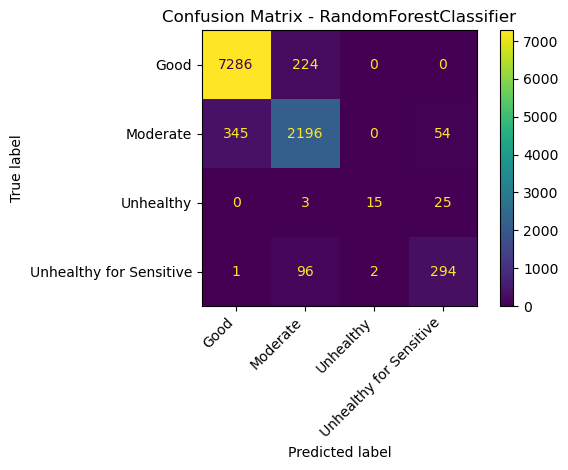

In [45]:
# Random Forest Classifier confusion matrix 
rf_model_cm_plot = plot_confusion_matrix(y_test=rf_model["y_test"], y_pred=rf_model["y_pred"], 
                                           class_names=le.classes_, model_name="RandomForestClassifier")

#### KNeighborsClassifier

In [46]:
# KNeighborsClassifier classification report
knn_model = train_classification_models(X_train=X_train_cl, X_test=X_test_cl, 
                                        y_train=y_train_cl, y_test=y_test_cl, model_type='KNeighborsClassifier')

Classification Report for KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7510
           1       0.86      0.83      0.85      2595
           2       0.58      0.33      0.42        43
           3       0.78      0.76      0.77       393

    accuracy                           0.92     10541
   macro avg       0.80      0.72      0.75     10541
weighted avg       0.92      0.92      0.92     10541



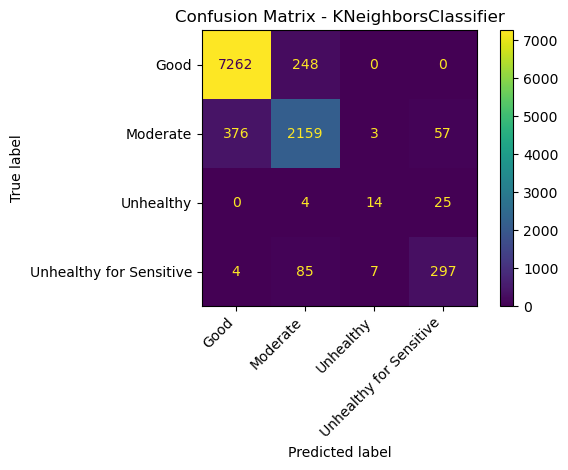

In [47]:
# KNeighborsClassifier confusion matrix 
knn_model_cm_plot = plot_confusion_matrix(y_test=knn_model["y_test"], y_pred=knn_model["y_pred"], 
                                           class_names=le.classes_, model_name="KNeighborsClassifier")

#### GradientBoostingClassifier

In [48]:
# Gradient Boosting classification report
gb_model = train_classification_models(X_train=X_train_cl, X_test=X_test_cl, 
                                        y_train=y_train_cl, y_test=y_test_cl, model_type='GradientBoostingClassifier')

Classification Report for GradientBoostingClassifier:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7510
           1       0.85      0.79      0.82      2595
           2       0.55      0.42      0.47        43
           3       0.72      0.65      0.68       393

    accuracy                           0.91     10541
   macro avg       0.76      0.71      0.73     10541
weighted avg       0.91      0.91      0.91     10541



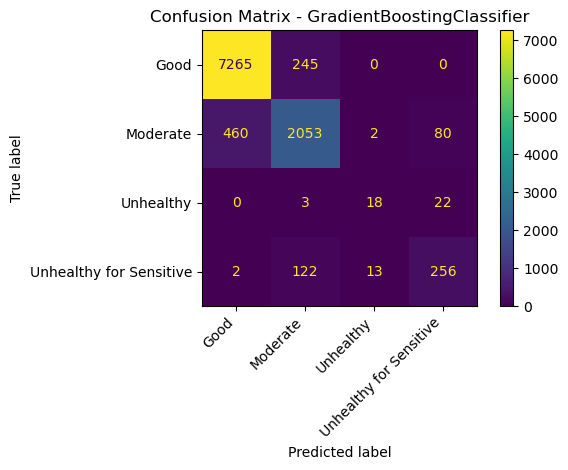

In [49]:
# GradientBoostingClassifier confusion matrix
gb_model_cm_plot = plot_confusion_matrix(y_test=gb_model["y_test"], y_pred=gb_model["y_pred"], 
                                           class_names=le.classes_, model_name="GradientBoostingClassifier")

## CONCLUSION
The best regression model out of the many tested ones for predicting air quality index values (AQI) is the RandomForestRegressor with RMSE (7.7524) and an R2 score (0.9113). It is the lowest RMSE score and the closest R2 score to +1, making it the best performer

The correlation heatmap of polutants against AQI showed that PM10 has the highest correlation (0.87) with AQI as compared to other pollutants. 

For classification of air quality index based on categories that are consistent with the official AQI ranges, RandomForestClassifier was the stand out model with the best accuracy and f1_score as seen in the classification report. It's confusion matrix also showed high numbers along the diagonal axis signalling a high percentage of well predicted classes